In [15]:
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt

#**Создадим список из случайных элементов**
#**Меняя seed можно получить разные выборки** 

In [16]:
randomlist = []
random.seed(10)
for i in range(0,30):
    n = random.randint(1,40)
    randomlist.append(n)

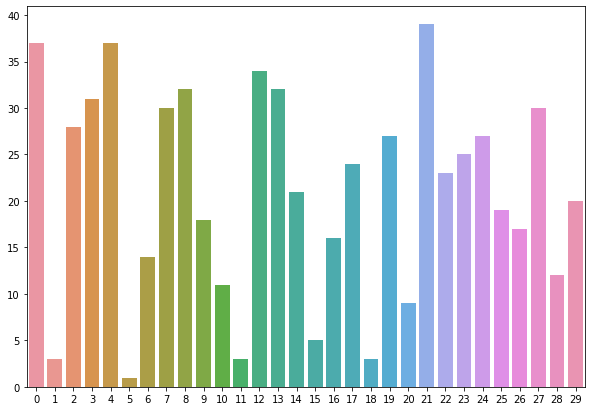

In [17]:
plt.figure(figsize=(10,7))
ax=sns.barplot(x=[i for i,v in enumerate(randomlist)], y=randomlist)

#**Функция Variant1. Вход: список значений.**
#**Выход: Максимумы, между которыми будет вода.** 
#**- находим все максимумы слева направо до максимального значения;**
#**- находим все максимумы справа налево до максимального значения;**
#**- формируем список из максимумов, удаляем дубли,сортируем.**


In [18]:
def Variant1(data):
    a_max=data[0]
    a=[]
    if a_max>randomlist[1]:
        a.append(0) 
    for i in range(1, len(randomlist)):
        if data[i]>=a_max:
            a.append(i)
            a_max=data[i]
    b_max=data[-1]
    b=[]
    if b_max>randomlist[-2]:
        b.append(len(randomlist)-1)
        print(len(randomlist)-1)
    for i in reversed(range(0,len(randomlist)-1)):
        if data[i]>=b_max:
            b.append(i)
            b_max=data[i]

    a.extend(b)
    a=list(set(a))
    a.sort()
    return a

#**Расчет максимумов, между которыми будет вода**


In [19]:
a=Variant1(randomlist)

29


In [20]:
a

[0, 4, 21, 27, 29]

#**Найдем площадь между каждыми максимумами и просуммируем их**

In [21]:
summ=[]

In [22]:
for i in range(1,len(a)):
    a_max=max(randomlist[a[i-1]],randomlist[a[i]])
#    new=randomlist[a[i-1]+1:a[i]]
    new=[a_max-x for x in randomlist[a[i-1]+1:a[i]]]
    summ.append(sum(new))

In [23]:
summ_total=sum(summ)

#**Общая площадь, которую займет вода с учетом того, что ширина каждого столбика равна единице** 

In [24]:
summ_total

495

#**Для визуализации результатов создадим список по количеству элементов равным исходному**
#**В том столбике, где вода, зададим его значение равное высоте воды в данном интервале между максимумами**

In [25]:
s_total=[0]*len(randomlist)

In [26]:
for i in range(1,len(a)):
    a_min = min(randomlist[a[i-1]],randomlist[a[i]])
    for j in range(a[i-1],a[i]):
#        print(j, a_min)
        s_total[j]=a_min


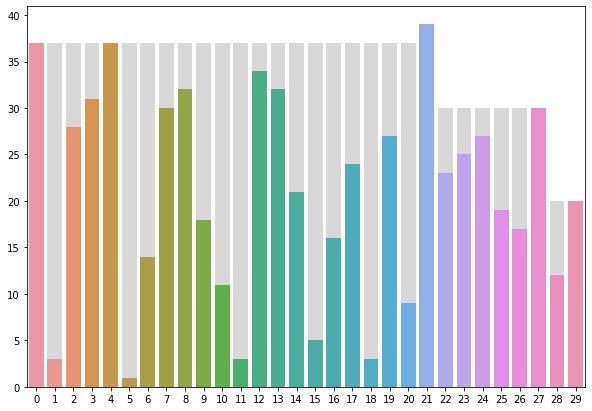

In [27]:
plt.figure(figsize=(10,7))
ax=sns.barplot(x=[i for i,v in enumerate(s_total)], y=s_total, color ='grey', alpha=0.3)
ax2=sns.barplot(x=[i for i,v in enumerate(randomlist)], y=randomlist)